In [24]:
# For loading the dataframe
import pickle

# For loading data and data manipulation
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# For cleaning the text
from nltk.corpus import stopwords
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

# For converting them into vectors
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# For model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score

# Loading the datasets

In [2]:
df_predict = pickle.load(open("eda_data/predict.pkl", "rb"))
df_predict.head()

,Preferences,Category,Category_Num
0,I’m more of a tea person 🍵$$$I prefer herbal/d...,decaf,16
1,I’m more of a tea person 🍵$$$I prefer herbal/d...,sweet,3
2,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",hard liquor,7
3,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",accessory,1
4,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",LiquorAccessory,0


# Clean the preference

In [3]:
# Creating object of tokenizer and lemmatizer
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()

In [4]:
# Function to clean the Preference column
def clean_pref(row):
    # convert into lower character
    row = row.lower()
    # split string into words
    words = tokenizer.tokenize(row)
    # remove stop words and apply lemmatization
    words = [lemmatizer.lemmatize(word.strip()) for word in words if word not in stopwords.words('english')]
    # convert word into string again and return
    return ' '.join(words)

In [5]:
%%time
# Applying clean preference function to transform the text
df_predict['Preference_Clean'] = df_predict['Preferences'].apply(clean_pref)

CPU times: user 9.22 s, sys: 1.6 s, total: 10.8 s
Wall time: 10.8 s


In [6]:
df_predict.head()

,Preferences,Category,Category_Num,Preference_Clean
0,I’m more of a tea person 🍵$$$I prefer herbal/d...,decaf,16,tea person prefer herbal de caffeinated tea ch...
1,I’m more of a tea person 🍵$$$I prefer herbal/d...,sweet,3,tea person prefer herbal de caffeinated tea ch...
2,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",hard liquor,7,drink coffee tea chocolate candy baked treat s...
3,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",accessory,1,drink coffee tea chocolate candy baked treat s...
4,"I don’t drink coffee or tea 🤭$$$ Chocolates, C...",LiquorAccessory,0,drink coffee tea chocolate candy baked treat s...


# Split the data into train and test

In [7]:
X = df_predict['Preference_Clean']
y = df_predict['Category_Num']

X.shape, y.shape

((3711,), (3711,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2968,), (743,), (2968,), (743,))

# Converting feature into vectors

In [9]:
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')

In [10]:
X_train_vec = tfidf.fit_transform(X_train).toarray()
X_test_vec = tfidf.transform(X_test).toarray()

In [11]:
X_train_vec.shape

(2968, 584)

# Creating a model

In [26]:
model_perf = []

In [25]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=97)
bnb = BernoulliNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [12]:
classifiers = [svc, knc, bnb, mnb, dtc, lrc, rfc, abc, bc, etc, gbdt]
for classifier in classifiers:
    classifier.fit(X_train_vec, y_train)
    y_pred = classifier.predict(X_test_vec)
    acc = accuracy_score
    model_perf.append({''})

### Logistic Regression

In [13]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)

y_pred = lr.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)

model_perf.append({'Model': 'Logistic Regression', 'Accuracy': acc})

### Tweedie Regressor

In [14]:
tr = TweedieRegressor()
tr.fit(X_train_vec, y_train)

y_pred = tr.predict(X_test_vec)
y_pred = [math.floor(pred) for pred in y_pred]
acc = accuracy_score(y_test, y_pred)

model_perf.append({'Model': 'Tweedie Regression', 'Accuracy': acc})

### Random Forest Classifier

In [15]:
rfc = RandomForestClassifier()
rfc.fit(X_train_vec, y_train)

y_pred = rfc.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)

model_perf.append({'Model': 'Random Forest Classifier', 'Accuracy': acc})

### Gaussian Naive Bayes

In [16]:
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

y_pred = mnb.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)

model_perf.append({'Model': 'Gaussian Naive Bayes', 'Accuracy': acc})

### K Nearest Neighbour

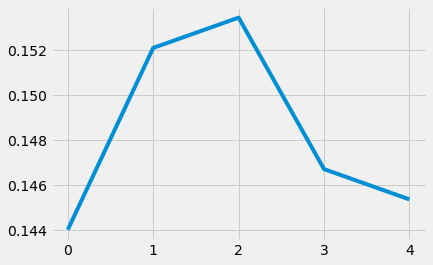

In [17]:
acc = []
for i in range(95,100):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train_vec, y_train)

    y_pred = knc.predict(X_test_vec)
    acc.append(accuracy_score(y_test, y_pred))
    
plt.plot(acc)

In [18]:
knc = KNeighborsClassifier(n_neighbors=97)
knc.fit(X_train_vec, y_train)

y_pred = knc.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)

model_perf.append({'Model': 'K Nearest Neighbour', 'Accuracy': acc})

### Model performance

In [19]:
pd.DataFrame(model_perf)

,Model,Accuracy
0,Logistic Regression,0.123822
1,Tweedie Regression,0.060565
2,Random Forest Classifier,0.008075
3,Gaussian Naive Bayes,0.134590
4,K Nearest Neighbour,0.153432


# Loading the test data

In [20]:
df_test = pd.read_csv("data/test_input.csv")
df_test.head()

,Unnamed: 0,OrderID,OrderPrice,Preferences
0,1001,171888537,40,I'm a coffee person ☕️$$$I love to make pour o...
1,1002,171888536,40,I'm a coffee person ☕️$$$I love to make pour o...
2,1003,171888535,40,"I don’t drink coffee or tea 🤭$$$ Chocolates, C..."
3,1004,171888533,30,I'm a coffee person ☕️$$$I love to make pour o...
4,1005,171888532,50,I’m more of a tea person 🍵$$$Any specialty tea...


In [21]:
X_test_sample = df_test['Preferences'].apply(clean_pref)
X_test_sample.head()

0    coffee person love make pour specialty coffee ...
1    coffee person love make pour specialty coffee ...
2    drink coffee tea chocolate candy baked treat h...
3    coffee person love make pour specialty coffee ...
4    tea person specialty tea good chocolate candy ...
Name: Preferences, dtype: object

In [22]:
X_test_sample_vec = tfidf.transform(X_test_sample)